In [19]:
import glob, random, time, os, sys

import numpy as np
import cv2
from sklearn.cluster import KMeans

In [20]:
# get input image and do kmeans clustering then return the mask
def kmeans(image, k=2):
    # reshape the image to a 2D array of pixels and grayscale value
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    pixel_values = np.float32(image.reshape(-1))
    # define stopping criteria
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    _, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    # convert to grayscale image
    centers = np.uint8(centers)
    segmented_image = centers[labels.flatten()]
    return segmented_image.reshape(image.shape)


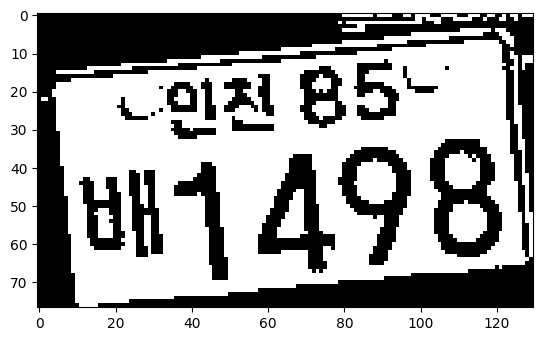

In [21]:

files = glob.glob(os.path.join('debug', '*.jpg'))
# shuffle
random.shuffle(files)
# read image
image = cv2.imread(files[0])
# apply the kmeans function
segmented_image = kmeans(image, 2)
# show the image via plt
from matplotlib import pyplot as plt
plt.imshow(segmented_image, cmap='gray')
plt.show()


NOT WORK on some license plate with extra characters such as US license plate like above.
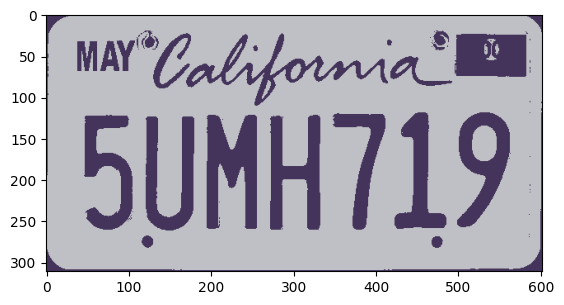
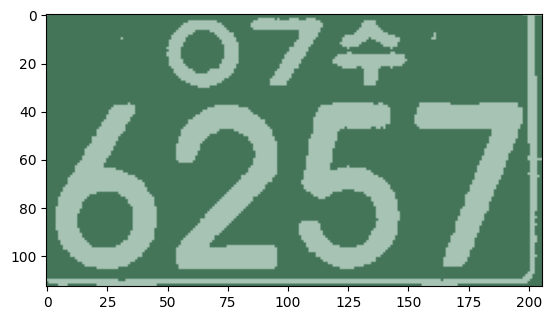